<a href="https://colab.research.google.com/github/amelieloh21/WBS_Data-Science-and-Gen-AI/blob/main/Exploratory_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I will first load the dataset and check the various variables provided.

In [ ]:
import pandas as pd
df = pd.read_csv('loan_data.csv')
df.head()

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,17.2,25579,692,5.3,895,10820,0,0,0,600,17.02,0.423,0.023,0.008,1
1,33,7.3,43087,627,3.5,169,16550,0,1,0,53300,14.10,0.384,1.237,0.412,0
2,42,1.1,20840,689,8.4,17,7852,0,0,0,2100,18.33,0.377,0.101,0.034,1
3,53,0.5,29147,692,9.8,1480,11603,0,1,0,2900,18.74,0.398,0.099,0.033,1
4,32,12.5,63657,630,7.2,209,12424,0,0,0,99600,13.92,0.195,1.565,0.522,1


I shall now check for any missing or incomplete data.

In [ ]:
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


,0
age,0
years_employed,0
annual_income,0
credit_score,0
credit_history_years,0
savings_assets,0
current_debt,0
defaults_on_file,0
delinquencies_last_2yrs,0
derogatory_marks,0


Based on the heatmap generated by the code, we verify that there are also no missing values displayed.

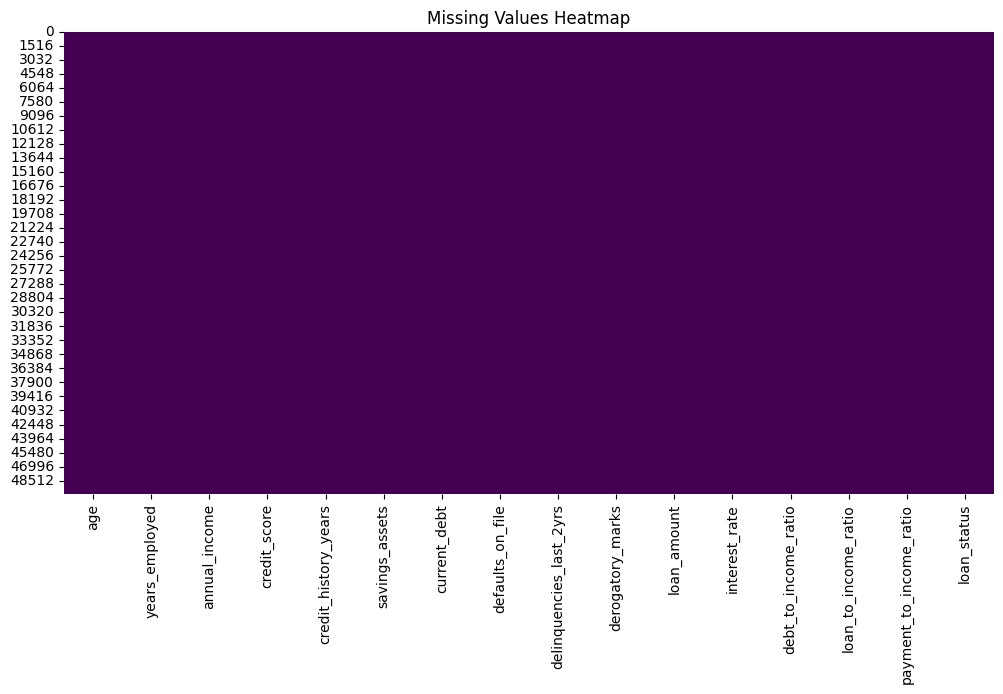

Heatmap showing no missing values has been displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
print("Heatmap showing no missing values has been displayed.")

We have checked that there are no missing values and we can proceed with checking for the number of duplicated columns and values.

In [ ]:
num_duplicated_rows = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicated_rows}")

Number of duplicated rows: 0


Now that we know there are no duplicated values, we can proceed with data visualisation. I will run a box plot of loan_status against annual_income.

<Figure size 800x600 with 0 Axes>

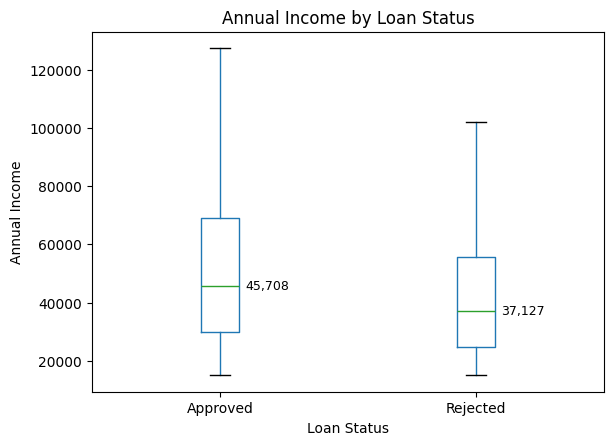

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (update path if needed)
df = pd.read_csv("loan_data.csv")

# Map loan_status to readable labels
df["loan_status_label"] = df["loan_status"].map({
    0: "Rejected",
    1: "Approved"
})

# Create the box plot
plt.figure(figsize=(8, 6))
bp = df.boxplot(
    column="annual_income",
    by="loan_status_label",
    showfliers=False
)

# Calculate median annual income for each loan status
median_incomes = df.groupby('loan_status_label')['annual_income'].median()

# Add median values as text annotations on the plot
for i, status in enumerate(median_incomes.index):
    median_val = median_incomes.loc[status]
    # The boxplot groups are typically at x=1, x=2, etc.
    # Adjust x-coordinate slightly to place text beside the median line
    plt.text(i + 1.10, median_val, f'{median_val:,.0f}', va='center', color='black', fontsize=9)

# Formatting
plt.title("Annual Income by Loan Status")
plt.suptitle("")  # Removes automatic pandas subtitle
plt.xlabel("Loan Status")
plt.ylabel("Annual Income")
plt.grid()

plt.show()

We now run an OLS Regression to measure the relationship between annual income and loan status. While the coefficient on annual income is small, there is still a positive relationship between annual income and loan status. In practical terms, for every unit increase in annual income, the probability of loan approval increases by a very small amount. The p value for annual income is 0, which is much less than the significance level of 0.05, implying that the observed relationship is statistically significant.

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Define the dependent variable (y) and independent variable (X)
y = df['loan_status']
X = df['annual_income']

# Add a constant to the independent variable (for the intercept term)
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1288.
Date:                Fri, 21 Nov 2025   Prob (F-statistic):          1.73e-278
Time:                        13:46:33   Log-Likelihood:                -35398.
No. Observations:               50000   AIC:                         7.080e+04
Df Residuals:                   49998   BIC:                         7.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4295      0.004    106.772

To improve standardisation of data and interpretability of visualisations for the plots, we can scale the variables to a normal distribution.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Identify numerical columns to be standardized (excluding binary or discrete count columns)
# Based on previous df.info() and df.describe() outputs
columns_to_standardize = [
    'age',
    'years_employed',
    'annual_income',
    'credit_score',
    'credit_history_years',
    'savings_assets',
    'current_debt',
    'loan_amount',
    'interest_rate',
    'debt_to_income_ratio',
    'loan_to_income_ratio',
    'payment_to_income_ratio'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Create a copy of the DataFrame to store standardized data
df_scaled = df.copy()

# Apply StandardScaler to the selected columns
df_scaled[columns_to_standardize] = scaler.fit_transform(df_scaled[columns_to_standardize])

print("Data standardization (Z-normalization) completed for selected numerical columns.")
print("Here are the first 5 rows of the standardized data:")
display(df_scaled.head())

Data standardization (Z-normalization) completed for selected numerical columns.
Here are the first 5 rows of the standardized data:


,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,0.453563,1.280229,-0.750345,0.747482,-0.397958,-0.204093,-0.262046,0,0,0,-1.242226,0.374003,0.859129,-1.457758,-1.455529,1
1,-0.176018,-0.020345,-0.213787,-0.256675,-0.647698,-0.258959,0.170615,0,1,0,0.775700,-0.343811,0.615051,1.148607,1.146448,0
2,0.633444,-0.834846,-0.895579,0.701137,0.032151,-0.270446,-0.486154,0,0,0,-1.184790,0.696037,0.571242,-1.290298,-1.288075,1
3,1.622787,-0.913669,-0.640998,0.747482,0.226393,-0.159883,-0.202923,0,1,0,-1.154157,0.796826,0.702669,-1.294592,-1.294515,1
4,-0.265959,0.662785,0.416612,-0.210330,-0.134343,-0.255936,-0.140931,0,0,0,2.548565,-0.388060,-0.567789,1.852798,1.854907,1


Using the standardised values, we can now plot a linear regression of loan status versus the annual income. The scatter of data points is widely spread around the regression line. This large dispersion indicates that while there is a trend, annual income alone is not a strong predictor of loan status as many other factors such as credit score and credit history influence loan approval.

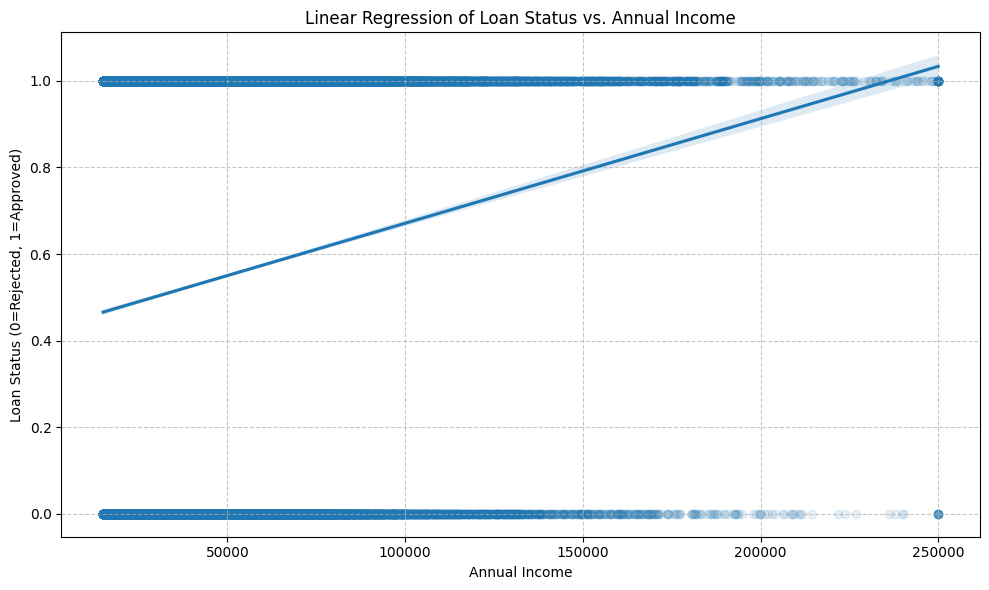

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='annual_income', y='loan_status', data=df, logistic=False, scatter_kws={'alpha':0.1})
plt.title('Linear Regression of Loan Status vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Status (0=Rejected, 1=Approved)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()